In [13]:
#Importing the libraries
import pandas as pd
import numpy as np
import os
import random

# visualizations
import matplotlib.pyplot as plt
from IPython.display import Image
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import initializers

import math

## Read in the data

In [3]:
# Input of the data sets
df_test = pd.read_csv('../Data/processed_data/test.csv')
df_train = pd.read_csv('../Data/processed_data/train.csv')
df_val = pd.read_csv('../Data/processed_data/validation.csv')

# Looking at the shapes
print('Shape of train df:', df_train.shape)
print('Shape of val df:', df_val.shape)
print('Shape of test df:', df_test.shape)

# Looking at labels for the training data
print('labels:', df_train['label'].unique())

Shape of train df: (1283, 28)
Shape of val df: (275, 28)
Shape of test df: (276, 28)
labels: ['Emergency_Vehicle_Sirens' 'Road_Noises']


## Taking a look at the data frames

In [4]:
# Training dataframe
print("Training dataframe")
display(df_train.head())

# Validation dataframe
print("Validation dataframe")
display(df_val.head())

# Test dataframe
print("Test dataframe")
display(df_test.head())

Training dataframe


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,ambulance217.wav,0.139713,0.086649,1718.602013,1358.252254,2621.874530,0.118756,-288.023376,114.704521,-49.967983,...,21.560863,-2.039799,-11.907887,4.912855,13.993547,2.139968,-1.012578,-5.569259,5.022685,Emergency_Vehicle_Sirens
1,ambulance614.wav,0.157152,0.311643,2124.173559,1696.108125,3580.723220,0.155499,-70.083099,98.373528,-64.853477,...,-2.383164,-20.189186,-8.850918,-7.337553,-9.583914,-6.074600,7.512115,-12.908149,-4.624047,Emergency_Vehicle_Sirens
2,ambulance296.wav,0.130614,0.104730,1135.478041,1637.776357,1971.530386,0.083637,-225.157990,140.605301,-3.439930,...,-6.337937,0.079239,16.186857,7.618846,6.098399,0.359855,-2.275174,-4.145103,12.254273,Emergency_Vehicle_Sirens
3,ambulance842.wav,0.340375,0.016640,1121.869495,1463.694632,1922.045429,0.076848,-337.975098,170.470551,-24.394335,...,0.555994,-4.280982,7.192675,2.134054,8.447920,-2.592149,-1.022108,-12.163561,1.063696,Emergency_Vehicle_Sirens
4,road855.wav,0.515787,0.089827,1971.318082,2248.139603,4054.146453,0.090444,-88.496468,113.961983,-16.151613,...,-2.643689,-5.490697,-1.663775,-9.920135,-4.093155,-12.266290,-5.661296,-10.810695,-5.942706,Road_Noises


Validation dataframe


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,road739.wav,0.661501,0.027666,940.278281,1561.021595,1538.549751,0.036951,-316.023346,176.219788,1.244518,...,5.736468,-3.966601,4.081047,0.110758,3.643136,2.069701,4.254798,-0.708044,2.181270,Road_Noises
1,road636.wav,0.628011,0.052810,1317.008663,2011.679881,2493.921338,0.042779,-213.219330,144.905273,2.988677,...,7.543186,-2.783920,1.139554,-2.582261,4.563808,0.948846,1.759201,1.498067,4.529062,Road_Noises
2,road891.wav,0.607537,0.071484,2014.803764,2267.943092,4154.970571,0.094483,-111.930817,110.350883,-14.448065,...,-0.075081,-5.765075,-2.396733,-7.879780,-3.312120,-6.184753,-1.200050,-7.041734,-4.881196,Road_Noises
3,ambulance879.wav,0.391392,0.331062,1085.145136,1447.050463,2644.235934,0.035184,-143.156403,131.383774,-49.640568,...,6.356728,3.640949,4.764835,8.963499,6.609685,5.121328,3.835176,5.135911,6.245784,Emergency_Vehicle_Sirens
4,road416.wav,0.611318,0.111014,1525.643345,1790.275861,3090.168457,0.055573,-172.462265,123.534531,-29.487867,...,8.670320,7.080060,1.436788,9.240026,4.670077,4.953111,2.219744,-0.054897,6.444773,Road_Noises


Test dataframe


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,ambulance60.wav,0.135675,0.315848,1898.848804,1106.674235,2739.064848,0.132071,-291.526093,52.365105,-58.922508,...,-10.125528,-12.645224,-12.418554,-4.079535,-3.813507,-7.979304,-21.127359,6.812933,-2.088927,Emergency_Vehicle_Sirens
1,road484.wav,0.607705,0.047920,919.285461,1521.917438,1567.442121,0.032897,-262.350983,174.064575,0.610273,...,4.321520,-4.152894,2.339159,0.861313,2.780704,1.377789,3.239335,0.323717,3.282176,Road_Noises
2,ambulance12.wav,0.155915,0.476349,1372.908705,1406.728199,2649.412184,0.085008,-105.908661,133.762878,-37.224716,...,-13.220674,-15.008803,13.903616,8.317987,4.885531,4.042785,-2.250869,0.186841,4.196811,Emergency_Vehicle_Sirens
3,ambulance79.wav,0.125836,0.384147,1514.020093,1195.359193,2419.172551,0.089600,-307.434692,64.912796,-30.861340,...,-27.882195,-12.673842,13.062023,8.610168,-4.309082,10.788350,-22.219261,-7.445416,5.048035,Emergency_Vehicle_Sirens
4,road886.wav,0.596005,0.140561,2367.605118,2550.730382,4992.254654,0.115311,-58.521023,93.014290,5.992186,...,0.675821,-5.448859,-4.368559,-9.176680,-1.639992,-6.719315,-2.704380,-5.570765,-4.214409,Road_Noises


## One-hot encoding

In [5]:
# encoding the label
df_train_encoded = pd.get_dummies(df_train, columns = ['label'], prefix ='', prefix_sep='', dtype=int)
df_test_encoded = pd.get_dummies(df_test, columns = ['label'], prefix ='', prefix_sep='', dtype=int)
df_val_encoded = pd.get_dummies(df_val, columns = ['label'], prefix ='', prefix_sep='', dtype=int)

X_train = df_train_encoded.iloc[:,1:27]
y_train = df_train_encoded.iloc[:,-2]
X_test = df_test_encoded.iloc[:,1:27]
y_test = df_test_encoded.iloc[:,-2]
X_validation = df_val_encoded.iloc[:,1:27]
y_validation = df_val_encoded.iloc[:,-2]

## Taking a look at the encoded dataframes

In [6]:
# Training dataframe
print("Training dataframe")
display(df_train_encoded.head())

# Validation dataframe
print("Validation dataframe")
display(df_val_encoded.head())

# Test dataframe
print("Test dataframe")
display(df_test_encoded.head())

Training dataframe


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Emergency_Vehicle_Sirens,Road_Noises
0,ambulance217.wav,0.139713,0.086649,1718.602013,1358.252254,2621.874530,0.118756,-288.023376,114.704521,-49.967983,...,-2.039799,-11.907887,4.912855,13.993547,2.139968,-1.012578,-5.569259,5.022685,1,0
1,ambulance614.wav,0.157152,0.311643,2124.173559,1696.108125,3580.723220,0.155499,-70.083099,98.373528,-64.853477,...,-20.189186,-8.850918,-7.337553,-9.583914,-6.074600,7.512115,-12.908149,-4.624047,1,0
2,ambulance296.wav,0.130614,0.104730,1135.478041,1637.776357,1971.530386,0.083637,-225.157990,140.605301,-3.439930,...,0.079239,16.186857,7.618846,6.098399,0.359855,-2.275174,-4.145103,12.254273,1,0
3,ambulance842.wav,0.340375,0.016640,1121.869495,1463.694632,1922.045429,0.076848,-337.975098,170.470551,-24.394335,...,-4.280982,7.192675,2.134054,8.447920,-2.592149,-1.022108,-12.163561,1.063696,1,0
4,road855.wav,0.515787,0.089827,1971.318082,2248.139603,4054.146453,0.090444,-88.496468,113.961983,-16.151613,...,-5.490697,-1.663775,-9.920135,-4.093155,-12.266290,-5.661296,-10.810695,-5.942706,0,1


Validation dataframe


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Emergency_Vehicle_Sirens,Road_Noises
0,road739.wav,0.661501,0.027666,940.278281,1561.021595,1538.549751,0.036951,-316.023346,176.219788,1.244518,...,-3.966601,4.081047,0.110758,3.643136,2.069701,4.254798,-0.708044,2.181270,0,1
1,road636.wav,0.628011,0.052810,1317.008663,2011.679881,2493.921338,0.042779,-213.219330,144.905273,2.988677,...,-2.783920,1.139554,-2.582261,4.563808,0.948846,1.759201,1.498067,4.529062,0,1
2,road891.wav,0.607537,0.071484,2014.803764,2267.943092,4154.970571,0.094483,-111.930817,110.350883,-14.448065,...,-5.765075,-2.396733,-7.879780,-3.312120,-6.184753,-1.200050,-7.041734,-4.881196,0,1
3,ambulance879.wav,0.391392,0.331062,1085.145136,1447.050463,2644.235934,0.035184,-143.156403,131.383774,-49.640568,...,3.640949,4.764835,8.963499,6.609685,5.121328,3.835176,5.135911,6.245784,1,0
4,road416.wav,0.611318,0.111014,1525.643345,1790.275861,3090.168457,0.055573,-172.462265,123.534531,-29.487867,...,7.080060,1.436788,9.240026,4.670077,4.953111,2.219744,-0.054897,6.444773,0,1


Test dataframe


,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,Emergency_Vehicle_Sirens,Road_Noises
0,ambulance60.wav,0.135675,0.315848,1898.848804,1106.674235,2739.064848,0.132071,-291.526093,52.365105,-58.922508,...,-12.645224,-12.418554,-4.079535,-3.813507,-7.979304,-21.127359,6.812933,-2.088927,1,0
1,road484.wav,0.607705,0.047920,919.285461,1521.917438,1567.442121,0.032897,-262.350983,174.064575,0.610273,...,-4.152894,2.339159,0.861313,2.780704,1.377789,3.239335,0.323717,3.282176,0,1
2,ambulance12.wav,0.155915,0.476349,1372.908705,1406.728199,2649.412184,0.085008,-105.908661,133.762878,-37.224716,...,-15.008803,13.903616,8.317987,4.885531,4.042785,-2.250869,0.186841,4.196811,1,0
3,ambulance79.wav,0.125836,0.384147,1514.020093,1195.359193,2419.172551,0.089600,-307.434692,64.912796,-30.861340,...,-12.673842,13.062023,8.610168,-4.309082,10.788350,-22.219261,-7.445416,5.048035,1,0
4,road886.wav,0.596005,0.140561,2367.605118,2550.730382,4992.254654,0.115311,-58.521023,93.014290,5.992186,...,-5.448859,-4.368559,-9.176680,-1.639992,-6.719315,-2.704380,-5.570765,-4.214409,0,1


## Looking for missing data

In [7]:
print("Training dataframe")
display(df_train_encoded.isnull().sum())

print("Validation dataframe")
display(df_val_encoded.isnull().sum())

print("Test dataframe")
display(df_test_encoded.isnull().sum())

Training dataframe


filename                    0
chroma_stft                 0
rmse                        0
spectral_centroid           0
spectral_bandwidth          0
rolloff                     0
zero_crossing_rate          0
mfcc1                       0
mfcc2                       0
mfcc3                       0
mfcc4                       0
mfcc5                       0
mfcc6                       0
mfcc7                       0
mfcc8                       0
mfcc9                       0
mfcc10                      0
mfcc11                      0
mfcc12                      0
mfcc13                      0
mfcc14                      0
mfcc15                      0
mfcc16                      0
mfcc17                      0
mfcc18                      0
mfcc19                      0
mfcc20                      0
Emergency_Vehicle_Sirens    0
Road_Noises                 0
dtype: int64

Validation dataframe


filename                    0
chroma_stft                 0
rmse                        0
spectral_centroid           0
spectral_bandwidth          0
rolloff                     0
zero_crossing_rate          0
mfcc1                       0
mfcc2                       0
mfcc3                       0
mfcc4                       0
mfcc5                       0
mfcc6                       0
mfcc7                       0
mfcc8                       0
mfcc9                       0
mfcc10                      0
mfcc11                      0
mfcc12                      0
mfcc13                      0
mfcc14                      0
mfcc15                      0
mfcc16                      0
mfcc17                      0
mfcc18                      0
mfcc19                      0
mfcc20                      0
Emergency_Vehicle_Sirens    0
Road_Noises                 0
dtype: int64

Test dataframe


filename                    0
chroma_stft                 0
rmse                        0
spectral_centroid           0
spectral_bandwidth          0
rolloff                     0
zero_crossing_rate          0
mfcc1                       0
mfcc2                       0
mfcc3                       0
mfcc4                       0
mfcc5                       0
mfcc6                       0
mfcc7                       0
mfcc8                       0
mfcc9                       0
mfcc10                      0
mfcc11                      0
mfcc12                      0
mfcc13                      0
mfcc14                      0
mfcc15                      0
mfcc16                      0
mfcc17                      0
mfcc18                      0
mfcc19                      0
mfcc20                      0
Emergency_Vehicle_Sirens    0
Road_Noises                 0
dtype: int64

# KNN Model

In [8]:
# Creating the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

# Training the KNN model
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred = knn.predict(X_test)

# Calculating the test accuracy of the model
print('------------')
print('Test, misclassified examples: %d' % (y_test != y_pred).sum())
accuracy_test = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy_test)

------------
Test, misclassified examples: 38
Test Accuracy: 0.8623188405797102


# Confusion Matrix

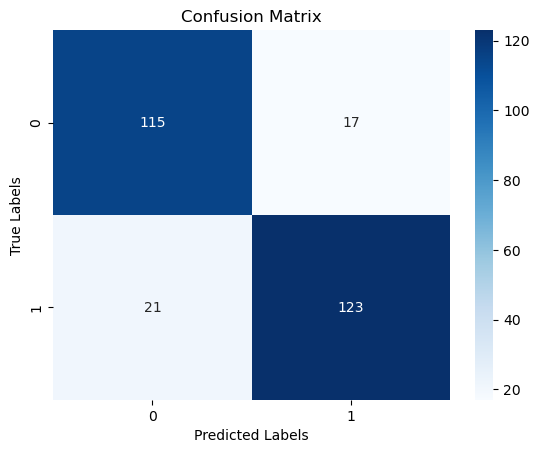

In [9]:
conf_matrix = confusion_matrix(y_test, y_pred) # confusion_matrix is available in sklearn.metrics
conf_matrix

# Creating a heatmap from the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

# Adding labels, title, and adjusting the plot
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Model Evaluation

In [10]:
# Looking at precision, recall and F1 scores
print('Precision score: %.3f' % precision_score(y_test, y_pred, average='macro'))
print('Recall score: %.3f' % recall_score(y_test, y_pred, average='macro'))
print('F1 score %.3f' % f1_score(y_test, y_pred, average='macro'))

Precision score: 0.862
Recall score: 0.863
F1 score 0.862


In [11]:
# Looking at the classification report
print('\n Classification report for k=5:\n', classification_report(y_test, y_pred))


 Classification report for k=5:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       132
           1       0.88      0.85      0.87       144

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



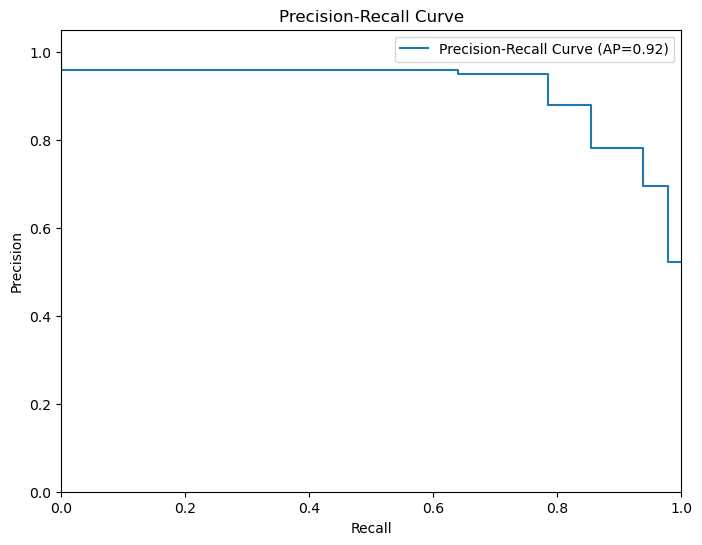

In [14]:
# Plotting precision recall curve
# Getting the probability scores for each class for the test set
y_scores = knn.predict_proba(X_test)

# Calculating the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores[:, 1])

# Calculate the average precision score
average_precision = average_precision_score(y_test, y_scores[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label='Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

# Misclassified indices

In [12]:
# Creating a list to store the misclassified examples
misclassified_indices = []

for i, (true_label, predicted_label) in enumerate(zip(y_test, y_pred)):
    if true_label != predicted_label:
        misclassified_indices.append(i)

# Printing the misclassified indices
print("Misclassified Indices:", misclassified_indices)

Misclassified Indices: [6, 11, 21, 29, 49, 51, 54, 59, 66, 84, 94, 98, 120, 121, 132, 137, 150, 157, 159, 163, 167, 168, 171, 172, 185, 187, 191, 192, 198, 203, 207, 211, 212, 215, 251, 258, 264, 268]


In [ ]:
pd.DataFrame(y_scores[:, 1]).to_csv('../Data/model_predictions/KNN_model.csv')